In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Set figure size to (14,6)
plt.rcParams['figure.figsize'] = (14,6)

In [2]:
##read your raw temperature file to notebook
raw_df= pd.read_csv(".\Data\TG_STAID002759.txt", delimiter=',', na_values=-9999, skiprows=19)


In [3]:
raw_df.columns

Index([' SOUID', '    DATE', '   TG', ' Q_TG'], dtype='object')

In [4]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0    SOUID    43830 non-null  int64  
 1       DATE  43830 non-null  int64  
 2      TG     43635 non-null  float64
 3    Q_TG     43830 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.3 MB


In [5]:
raw_df.isnull().sum()

 SOUID        0
    DATE      0
   TG       195
 Q_TG         0
dtype: int64

In [6]:
###change column name to easily understand
raw_df.columns = ['id', 'date', 'temp', 'quality']
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       43830 non-null  int64  
 1   date     43830 non-null  int64  
 2   temp     43635 non-null  float64
 3   quality  43830 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 1.3 MB


In [7]:
###check if there is unique numbers in the id column
raw_df['id'].value_counts()

111448    26664
127488    16802
128124      364
Name: id, dtype: int64

In [8]:
##drop id column as they are the same
raw_df.drop('id', axis=1, inplace=True)

In [9]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   date     43830 non-null  int64  
 1   temp     43635 non-null  float64
 2   quality  43830 non-null  int64  
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [10]:
###set date column in datetime format
raw_df['date'] = raw_df['date'].astype(str)
raw_df['date'] = pd.to_datetime(raw_df['date'])
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43830 entries, 0 to 43829
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     43830 non-null  datetime64[ns]
 1   temp     43635 non-null  float64       
 2   quality  43830 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 1.0 MB


In [11]:
###set datetime as index of table
raw_df.set_index('date', inplace=True)
raw_df.head()

,temp,quality
date,,
1901-01-01,-84.0,0
1901-01-02,-119.0,0
1901-01-03,-128.0,0
1901-01-04,-116.0,0
1901-01-05,-100.0,0


In [12]:
#based on the metadata, quality=9 means temp data not correct, so check if 
#you have any data quality=9
raw_df['quality'].value_counts()   ####data falls into this ,
##need to refill the temp data with quality equals to 9

0    43634
9      195
1        1
Name: quality, dtype: int64

In [13]:
raw_df['temp'].fillna(method='ffill', inplace=True)

In [14]:
raw_df.isnull().sum()

temp       0
quality    0
dtype: int64

In [15]:
###remove the quality column
raw_df.drop('quality', axis=1, inplace=True)
raw_df.head()

,temp
date,
1901-01-01,-84.0
1901-01-02,-119.0
1901-01-03,-128.0
1901-01-04,-116.0
1901-01-05,-100.0


In [16]:
##multipl the temp colum by 0.1
###create a new column with temperature in celcius
raw_df['temp_c'] = raw_df['temp']*0.1
raw_df.head()

,temp,temp_c
date,,
1901-01-01,-84.0,-8.4
1901-01-02,-119.0,-11.9
1901-01-03,-128.0,-12.8
1901-01-04,-116.0,-11.6
1901-01-05,-100.0,-10.0


In [17]:
##drop temp
raw_df.drop(columns='temp', inplace=True)

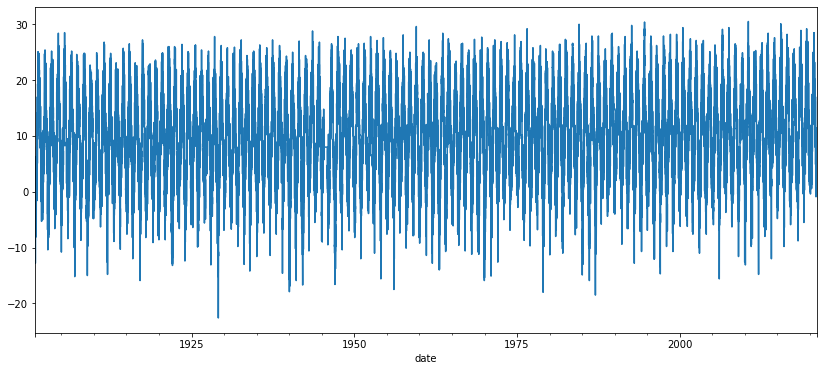

In [18]:
raw_df['temp_c'].plot()

plt.show()

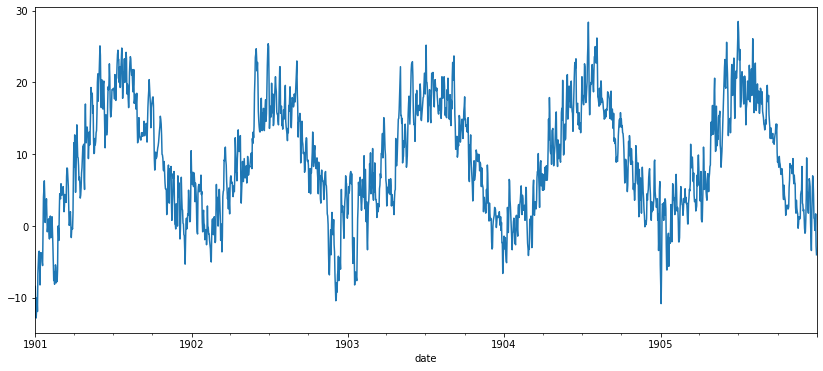

In [19]:
###the temp using diff slice based on the years and plot to see diff btw each slide
data_subset_1=raw_df.loc['1901':'1905']
data_subset_1['temp_c'].plot()

plt.show()



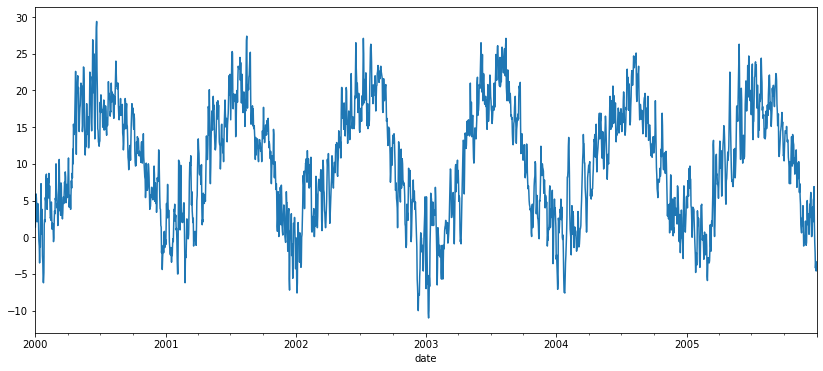

In [20]:
data_subset_2=raw_df.loc['2000':'2005']
data_subset_2['temp_c'].plot()

plt.show()

In [21]:
###divide data to train and test

In [22]:
raw_df.tail()

,temp_c
date,
2020-12-27,1.6
2020-12-28,2.8
2020-12-29,2.3
2020-12-30,2.5
2020-12-31,2.6


In [23]:

data_train=raw_df.loc['1970':'2019']
data_train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 18262 entries, 1970-01-01 to 2019-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp_c  18262 non-null  float64
dtypes: float64(1)
memory usage: 285.3 KB


In [24]:
data_train.to_csv("temp_train.csv")

In [25]:
data_test=raw_df.loc['2020']
data_test.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 366 entries, 2020-01-01 to 2020-12-31
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp_c  366 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [26]:
data_test.to_csv("temp_test.csv")